In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [9]:
df  = pd.read_csv("../Dataset/SCFP2022.csv")
df.head()

,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,3027.956120,2,70,5,9,3,2,2,...,4,2,4,2,1,8,3,3,2,1
1,1,12,3054.900065,2,70,5,9,3,2,2,...,4,2,5,2,1,8,3,3,2,1
2,1,13,3163.637766,2,70,5,9,3,2,2,...,4,2,4,2,1,8,3,3,1,1
3,1,14,3166.228463,2,70,5,9,3,2,2,...,3,2,4,1,1,6,3,2,1,1
4,1,15,3235.624715,2,70,5,9,3,2,2,...,3,2,4,2,1,8,3,3,1,1


In [10]:
filter  = df['TURNFEAR'] == 1
df = df[filter]
df.head()

,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
20,5,51,7191.481109,2,19,1,8,2,1,0,...,1,3,1,2,1,2,5,4,2,2
21,5,52,7352.487205,2,19,1,8,2,1,0,...,1,3,1,2,1,2,5,4,2,2
22,5,53,7270.703541,2,19,1,8,2,1,0,...,1,3,1,3,1,2,5,5,2,2
23,5,54,7383.866597,2,19,1,8,2,1,0,...,1,3,1,3,1,2,5,5,2,2
24,5,55,7330.537669,2,19,1,8,2,1,0,...,1,3,1,2,1,2,5,4,2,2


In [11]:
df_fear.shape

(3839, 356)

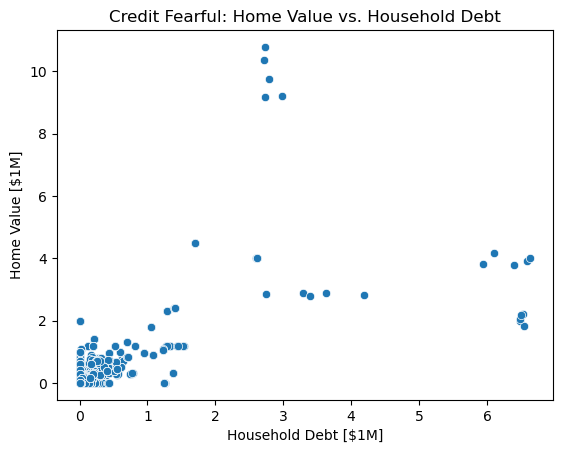

In [13]:
sns.scatterplot(x=df["DEBT"]/1e6,y=df["HOUSES"]/1e6)

plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

# Model Building
## We are performing Clustering Analysis on the dataset based on these two features as they reflected number of clusters when we plotted the scatterplot between them.
## using 2 features --- 'DEBT' and 'HOUSES'

In [14]:
X = df[["DEBT","HOUSES"]]
print(X.shape)
X.head()

(3839, 2)


,DEBT,HOUSES
20,11000,0
21,10000,0
22,10000,0
23,10000,0
24,11000,0


In [18]:
model = KMeans(n_clusters=4, random_state = 42,n_init='auto')

In [19]:
model.fit(X)

KMeans(n_clusters=4, n_init='auto', random_state=42)

In [20]:
labels = model.labels_
labels[:10]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

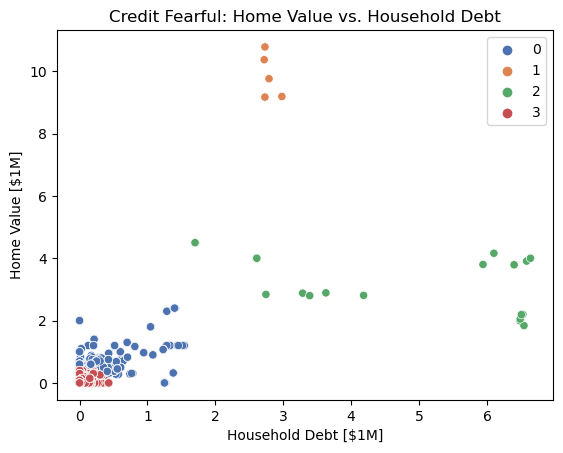

In [21]:
# Plot "HOUSES" vs "DEBT" with hue=label
sns.scatterplot(x=df["DEBT"]/1e6,
                y=df["HOUSES"]/1e6,
                hue=labels,
                palette= "deep"
)

plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

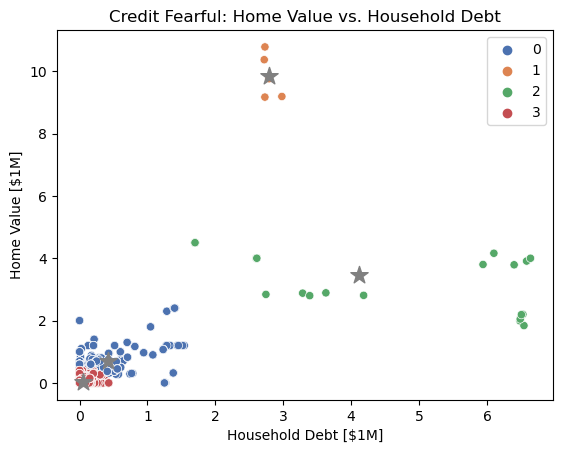

In [22]:
centroids = model.cluster_centers_
# Plot "HOUSES" vs "DEBT", add centroids
sns.scatterplot(x=df["DEBT"]/1e6,
                y=df["HOUSES"]/1e6,
                hue= labels,
                palette = "deep"
               
)

plt.scatter(x=centroids[:,0] / 1e6,
            y=centroids[:,1] / 1e6,
            marker="*",
            s=170,
            color="gray"

)

plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

In [24]:
inertia = model.inertia_
print("Inertia (4 clusters):", inertia)

Inertia (4 clusters): 297984588417512.8


In [25]:
ss = silhouette_score(X,model.labels_)
print("Silhouette Score (4 clusters):", ss)

Silhouette Score (4 clusters): 0.783700096705209


In [26]:
n_clusters = range (2,13)
inertia_errors = []
silhouette_scores = []

# Add `for` loop to train model and calculate inertia, silhouette score.
for k in n_clusters:
    #build model
    model = KMeans(n_clusters=k,random_state=42)
    #training of model
    model.fit(X)
    #calculating inertia of model and append to list inertia_errors
    inertia_errors.append(model.inertia_)
    #calculating ss and appenidng to list silhouette_scores 
    silhouette_scores.append(silhouette_score(X,model.labels_))
    


print("Inertia:", inertia_errors)
print()
print("Silhouette Scores:", silhouette_scores)

C:\Users\shukl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shukl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shukl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shukl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shukl\anaconda3\lib\site-packages\sklearn\clust

Inertia: [705340367647917.5, 475315192358408.0, 297915513890074.5, 190463085682281.5, 136753369087901.0, 113372629735148.86, 94240543838593.64, 80269730334411.89, 68358480371802.625, 61004147973687.17, 49207527426622.77]

Silhouette Scores: [0.951905651526154, 0.7821383506051494, 0.7837672544244059, 0.7758894606695186, 0.7561003647497938, 0.7242389613461061, 0.724662733130971, 0.7078697753107195, 0.707709269547229, 0.7154819418172015, 0.7139747291376894]


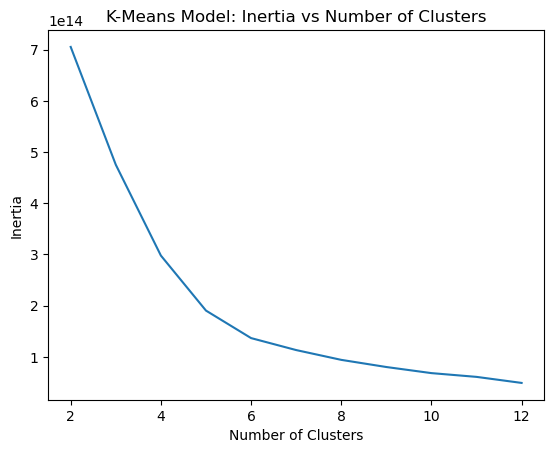

In [27]:
# Plot `inertia_errors` by `n_clusters`
plt.plot(n_clusters,inertia_errors);
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("K-Means Model: Inertia vs Number of Clusters");

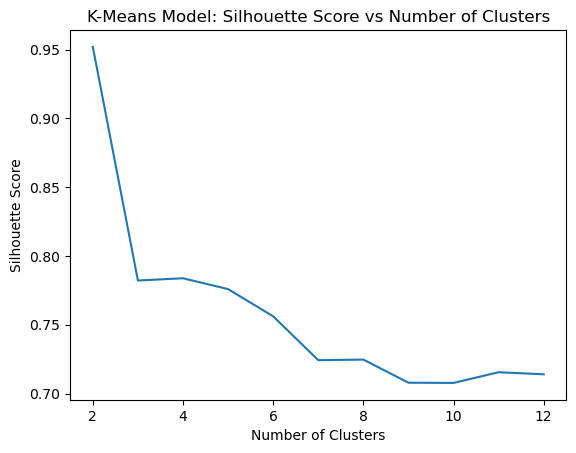

In [28]:
# Plot `silhouette_scores` vs `n_clusters`
plt.plot(n_clusters,silhouette_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("K-Means Model: Silhouette Score vs Number of Clusters");

# building model by k = 5 as its the best spot according to inertia and silhouette score plots

In [29]:
model_final_5 = KMeans(n_clusters= 5, random_state=42)
model_final_5.fit(X)

C:\Users\shukl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [30]:
labels = model_final_5.labels_

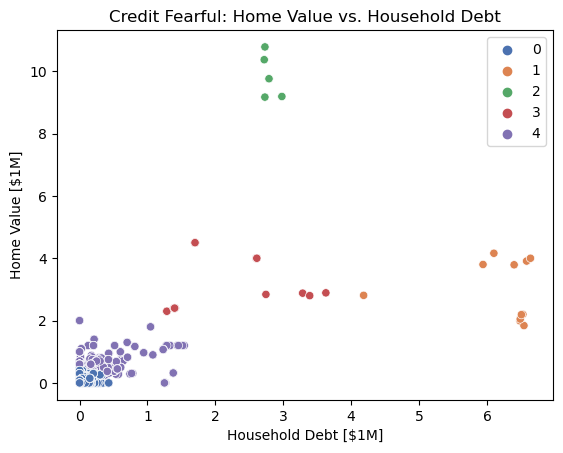

In [31]:
# Plot "HOUSES" vs "DEBT" with hue=label
sns.scatterplot(x=df["DEBT"]/1e6,
                y=df["HOUSES"]/1e6,
                hue=labels,
                palette= "deep"
)

plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

In [32]:
xgb = X.groupby(model_final_5.labels_).mean()
xgb

,DEBT,HOUSES
0,4.068230e+04,3.540611e+04
1,6.218182e+06,2.976364e+06
2,2.789220e+06,9.854000e+06
3,2.000458e+06,3.225417e+06
4,3.727353e+05,6.347846e+05


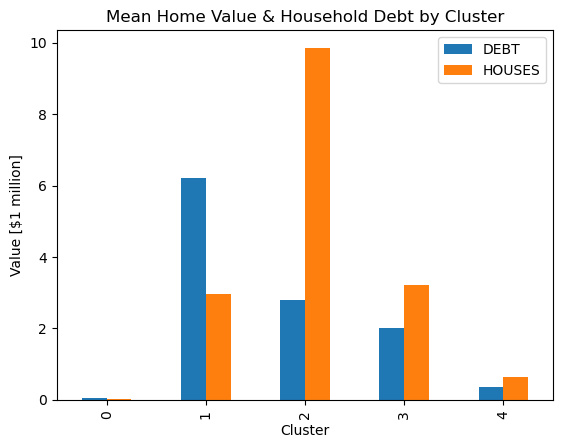

In [35]:
(xgb/ 1e6).plot(kind="bar")

plt.xlabel("Cluster")
plt.ylabel("Value [$1 million]")
plt.title("Mean Home Value & Household Debt by Cluster");
plt.savefig("../plotsandcharts/Mean Home Value & Household Debt by Cluster")

## For Cluster 2 we can see that these households have large house values and less debts 
## For cluster 1 we can see that these households have more debt as compared to their house values ,most probably these households have home mortgage

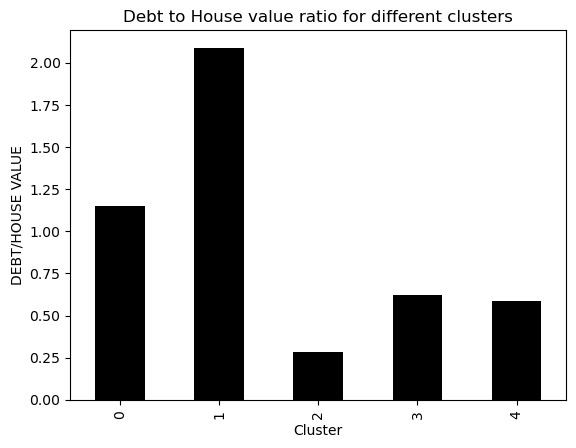

In [36]:
(xgb["DEBT"] / xgb["HOUSES"]).plot(kind="bar",color="black")
plt.title("Debt to House value ratio for different clusters")
plt.xlabel("Cluster")
plt.ylabel("DEBT/HOUSE VALUE")
plt.savefig("../plotsandcharts/Debt to House value ratio for different clusters")

## From this plot , its visible that the households from cluster 2 , 3, 4, are well to do in terms of financial status as having a less value of debt to house value is a siginificant indicator of it, in contrast to this households from 0 and 1 clusters have been involved in taking loans and thats the reason they are in credit fearful groups and also they have high debt to home value ratio.